# Job 2
<b>Number of accidents and percentage of number of deaths per contributing factor in the dataset</b>

After the required imports, let's read the dataset.

In [1]:
import pandas as pd
import numpy as np
import datetime
import xlsxwriter
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

ds = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv")

Let's define the set of labels of dataset columns that are needed in the analisys, to make easier work with them.

In [2]:
columns = ['CONTRIBUTING FACTOR VEHICLE 1',
           'CONTRIBUTING FACTOR VEHICLE 2',
           'CONTRIBUTING FACTOR VEHICLE 3',
           'CONTRIBUTING FACTOR VEHICLE 4',
           'CONTRIBUTING FACTOR VEHICLE 5']

Now we define the set of all the contributing factors we find in the dataset.

In [3]:
cf_sets = []

for c in columns:
    cf_sets.append(ds[c].unique())

cf = np.concatenate(cf_sets, axis=0)
cf = np.unique(cf)

idx = [0,46]
cf=np.delete(cf,idx)

print cf.shape

(47L,)


C:\Users\loren\Anaconda3\envs\py27\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Let's create a dataframe with a line for each contributing factor, and 3 columns: <b>SUM</b>, the number of the lethal accidents, <b>COUNT</b>, the number of the total accidents, <b>PERC</b>, the percentage of lethal accidents over the overall ones.

In [4]:
cfdf = pd.DataFrame(index = cf)
cfdf['SUM']=np.zeros(47)
cfdf['COUNT']=np.zeros(47)
cfdf['PERC']=np.zeros(47)

In [5]:
for i in ds.index:
    row_cf = []
    for c in columns:
        row_cf.append(str(ds.loc[i][c]))
    
    row_cf = np.unique(row_cf)
    row_cf = [x for x in row_cf if (not x=='Unspecified' and not x=='nan')]
    
    lethal = ds.loc[i]['NUMBER OF PERSONS KILLED'].astype('bool')
    for c in row_cf:
        cfdf.loc[c]['COUNT'] = cfdf.loc[c]['COUNT'] + 1
        cfdf.loc[c]['SUM'] = cfdf.loc[c]['SUM'] + lethal
    
""" 
Variant to consider a contributing factor more than once for a single accident

for c in columns:
    for k in cf:
        tempds = ds[ds[c] == k]
        sum = tempds['NUMBER OF PERSONS KILLED'].astype('bool').sum()
        count = len(tempds.index)
        cfdf.loc[k]['SUM'] = cfdf.loc[k]['SUM']+sum
        cfdf.loc[k]['COUNT'] = cfdf.loc[k]['COUNT']+count
"""
for k in cf:
    sum = cfdf.loc[k]['SUM']
    count = cfdf.loc[k]['COUNT']
    perc = 100*float(sum)/count
    perc = round(perc,2)
    cfdf.loc[k]['PERC'] = perc

print cfdf

                                                      SUM     COUNT  PERC
Accelerator Defective                                 0.0     431.0  0.00
Aggressive Driving/Road Rage                          6.0    3303.0  0.18
Alcohol Involvement                                  32.0    7807.0  0.41
Animals Action                                        0.0     500.0  0.00
Backing Unsafely                                     19.0   28695.0  0.07
Brakes Defective                                      0.0    2529.0  0.00
Cell Phone (hand-held)                                0.0     127.0  0.00
Cell Phone (hands-free)                               0.0     231.0  0.00
Driver Inattention/Distraction                      114.0  127004.0  0.09
Driver Inexperience                                  10.0   13132.0  0.08
Driverless/Runaway Vehicle                            0.0      70.0  0.00
Drugs (Illegal)                                       3.0     569.0  0.53
Failure to Keep Right                 

Finished the calculations, let's start with the analisys. We would like to plot the distribution of the total accidents per contributing factors, as well as their lethality percentage.

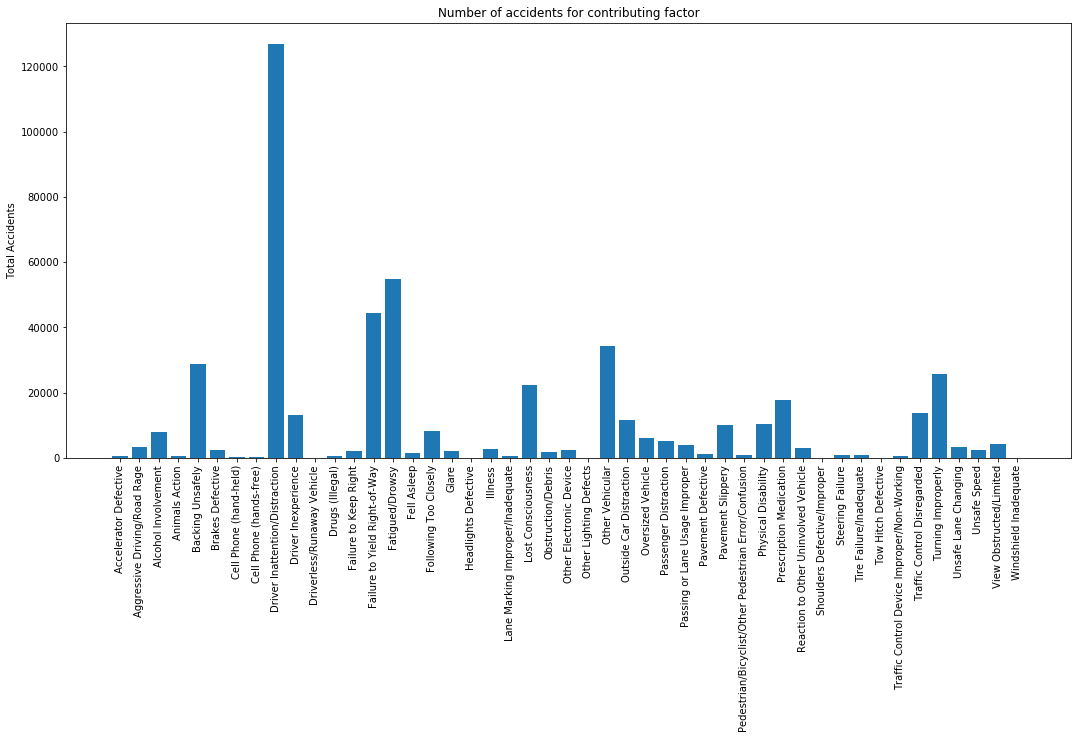

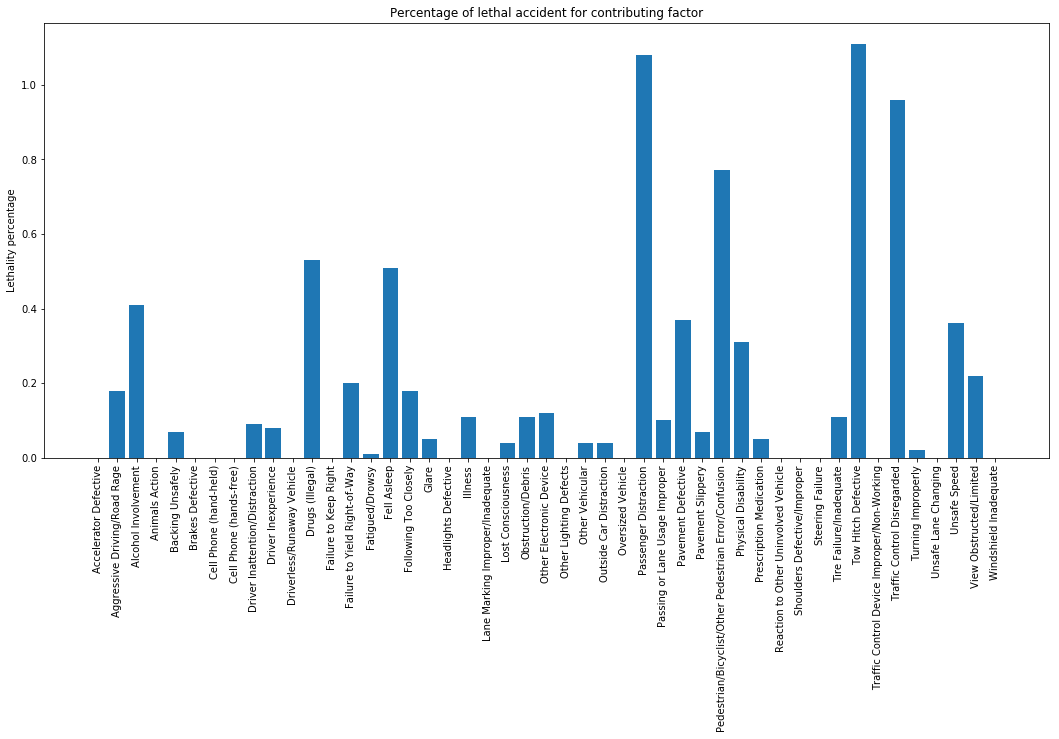

In [6]:
X = np.arange(len(cfdf.index))
Y1 = cfdf['COUNT'].values 
Y2 = cfdf['PERC'].values 


plt.figure(1, figsize=(18,8))
plt.ylabel('Total Accidents')
plt.title('Number of accidents for contributing factor')
plt.xticks(X, cfdf.index, rotation='vertical')
plt.bar(X, Y1)

plt.figure(2, figsize=(18,8))
plt.ylabel('Lethality percentage')
plt.title('Percentage of lethal accident for contributing factor')
plt.xticks(X, cfdf.index, rotation='vertical')
plt.bar(X, Y2)

plt.show()

<b>By this graphs we can figure out that the most accidents happens because of distraction and fatigue. Neverthless, these causes are not the most lethal ones: highest lethat to accidents ratio goes, in my opinion curiosly, to tow hatch defects, followed by distraction caused by passengers. Also important are the contributions of alchol and drugs, that cause more frequently deaths. Another unavoidable case is the pedestrian/byciclist error one, which is highly lethal. </b>

In [ ]:
writer = pd.ExcelWriter('outj2new.xlsx')
cfdf.to_excel(writer,'Sheet1')
writer.save()